In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [3]:
df_raw = pd.read_csv('houseprice_hw.csv')
df_raw.head()

,Unnamed: 0,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


In [4]:
df_raw.isnull().sum()

Unnamed: 0      0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

## 목표 레이블 : SalePrice

### exersise1. corr(), scatter을 이용해서 가장 상관관계가 큰 2개의 특성만 골라보기

In [5]:
df_raw_p = df_raw.iloc[:, 1:]
df_raw_p.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


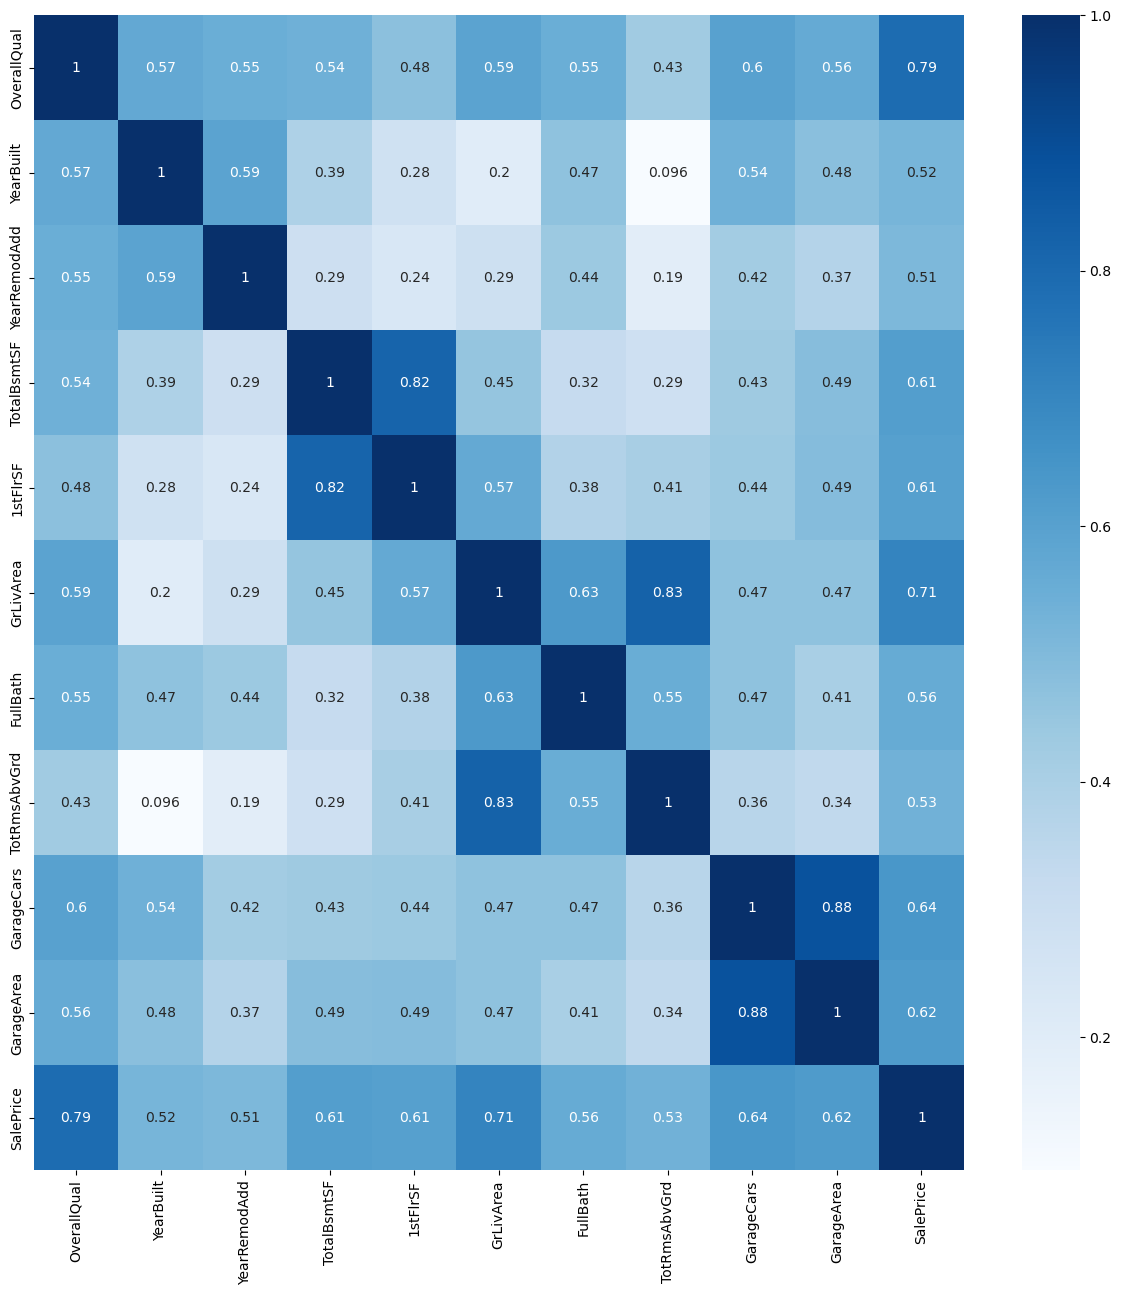

In [6]:
## code here!
plt.figure(figsize=(15, 15))
sns.heatmap(data=df_raw_p.corr(),annot=True, cmap='Blues')
plt.show()

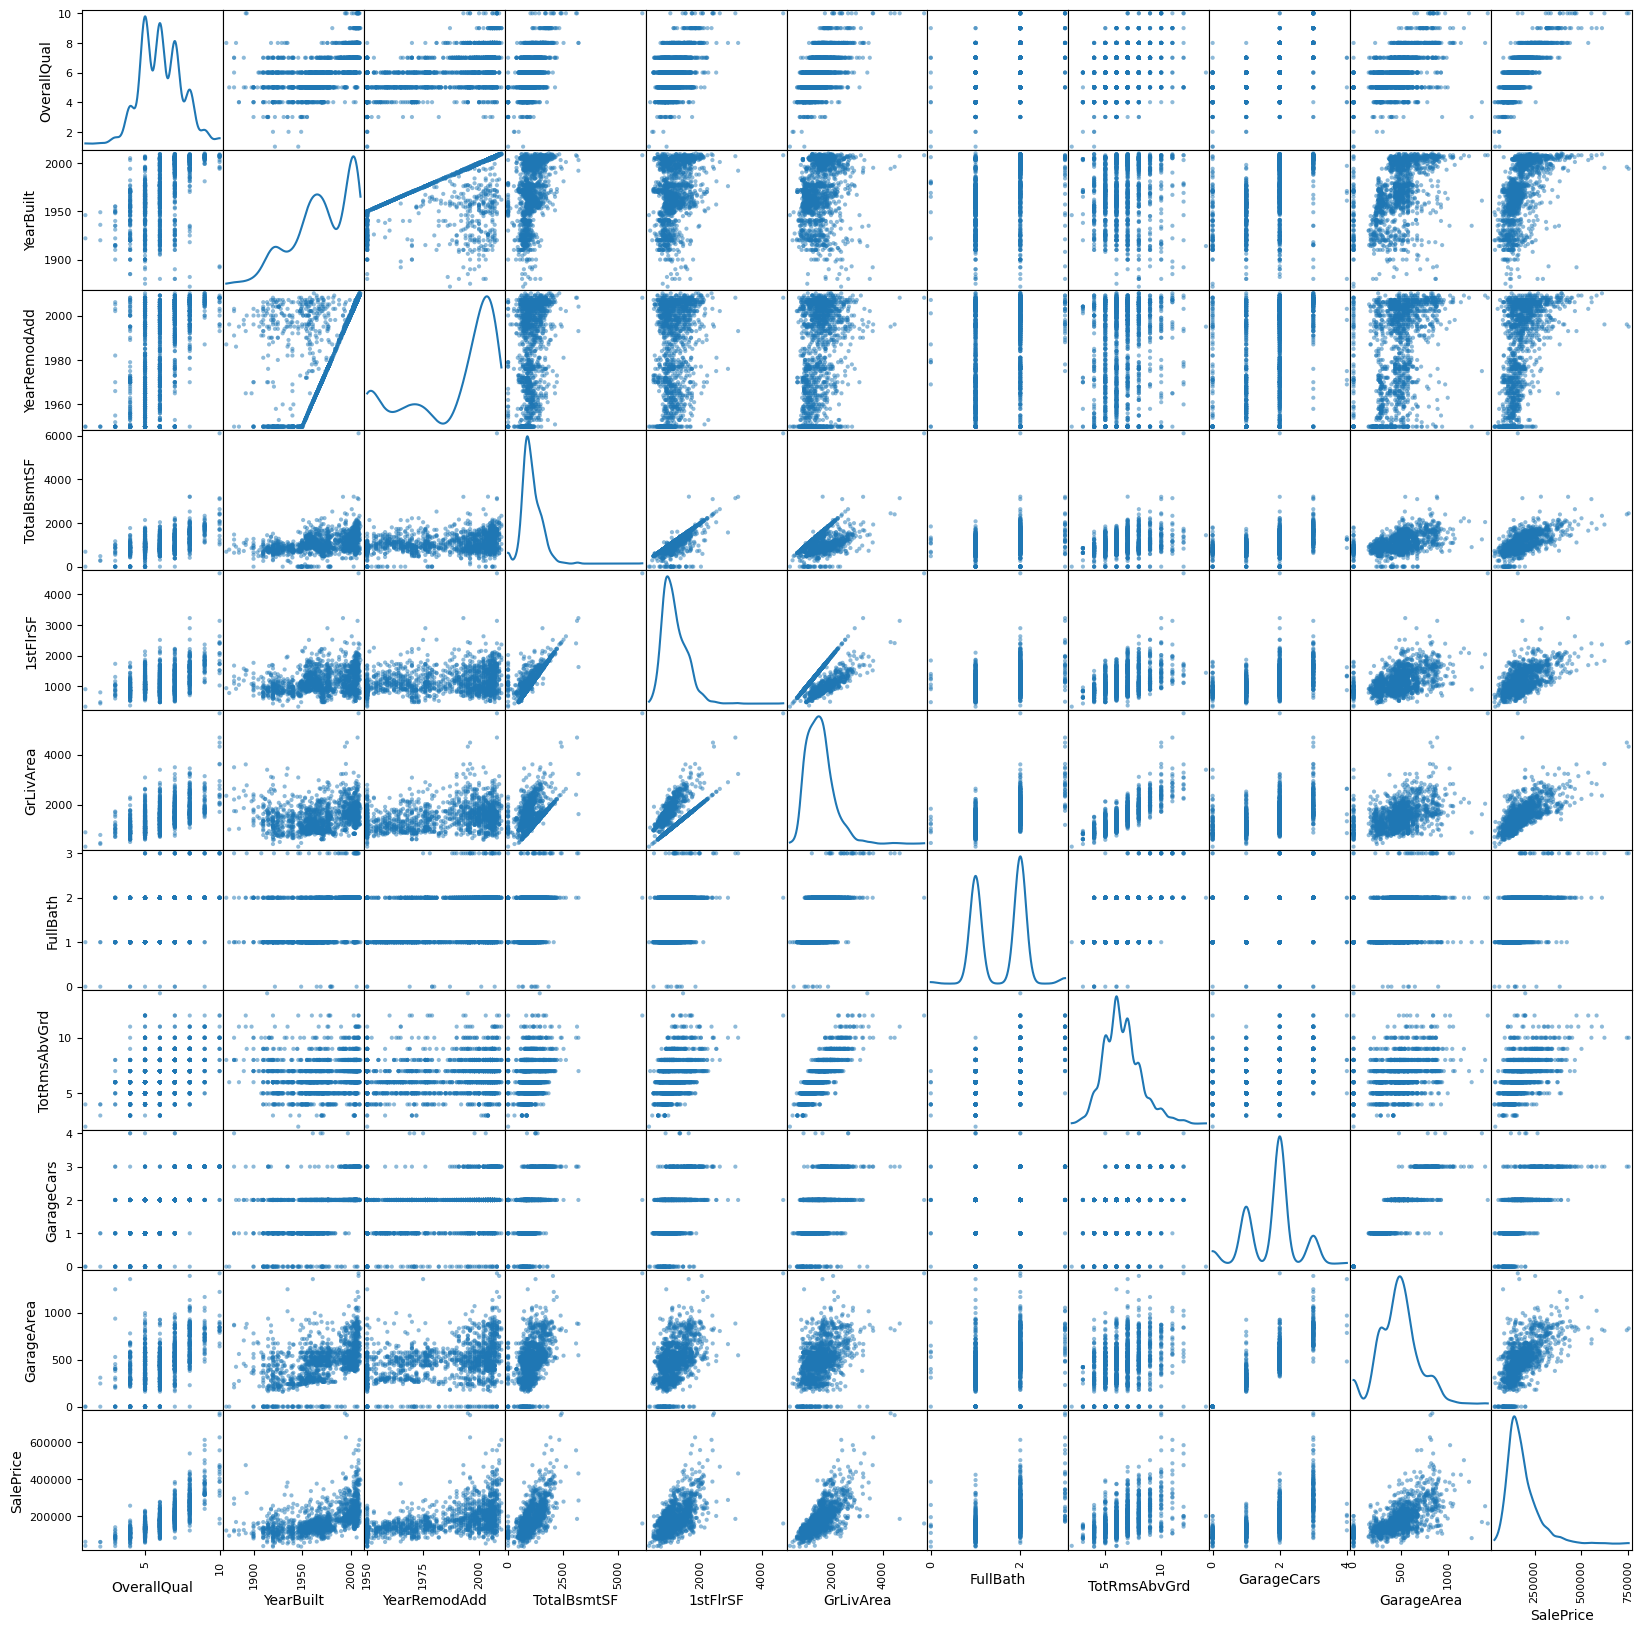

In [7]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt



# 모든 열 선택
chosen_features = df_raw_p.columns

# scatter_matrix 그리기
scatter_matrix(df_raw_p[chosen_features], diagonal='kde',figsize=(20, 20))

# 그래프 보여주기
plt.show()


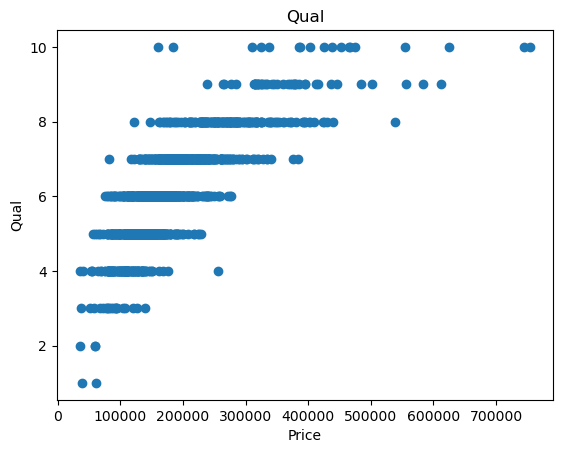

In [8]:
plt.scatter(df_raw_p["SalePrice"], df_raw_p["OverallQual"])
plt.title("Qual")
plt.xlabel("Price")
plt.ylabel("Qual")
plt.show()

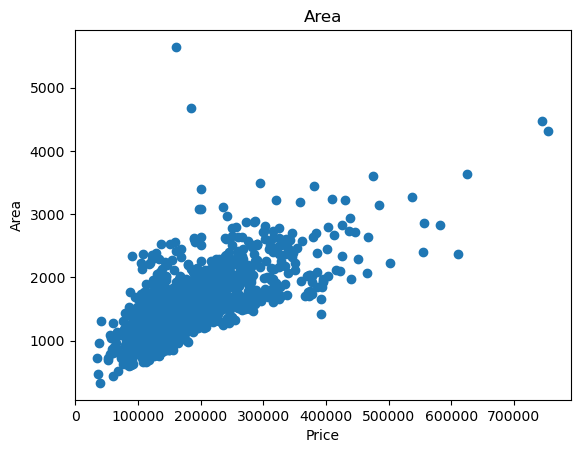

In [9]:
plt.scatter(df_raw_p["SalePrice"], df_raw_p["GrLivArea"])
plt.title("Area")
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()

### 퍼셉트론 알고리즘으로 모델 학습시키기.

hint! numpy배열을 함수의 인자로 하고, df는 함수의 인자로 받지 않으니깐, values를 이용해서 df의 값만 넣어주자.

df에 표준화를 하고, 학습시키는것을 권장. 

!!**주의**!! : 나중에 임의의 값 예측하기 위해서는 사용했던 표준화함수로 내가 넣고싶은값을 다시 표준화 해야함!!

model.predict(df_X, df_Y) (x)

model.predict(df_X.value, df_Y.value) (x)

In [10]:
## 예측하고나서, 3개정도의 값을 임의의로 넣어서 예측결과 출력해보시오!
## code here!

# 이전에 작성한 코드
import numpy as np
from sklearn.preprocessing import StandardScaler

# 상관관계가 큰 두 가지 특성만 선택
X = df_raw_p[["OverallQual", "GrLivArea"]].values
y = df_raw_p["SalePrice"].values

# 표준화 (StandardScaler 사용)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 퍼셉트론 클래스 정의 (이전에 작성한 코드를 그대로 사용)
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # 이진 분류를 위해 타겟값 설정 (SalePrice 200,000을 기준으로)
        y_ = np.where(y > 200000, 1, 0)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._unit_step_func(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._unit_step_func(linear_output)
        return y_predicted

# 모델 초기화 및 학습
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_scaled, y)

# 3개의 임의의 값으로 예측하기
# 예: OverallQual=7, GrLivArea=1800, etc
test_samples = np.array([[7, 1800],  # 1번 예측값
                         [8, 2500],  # 2번 예측값
                         [5, 1200]]) # 3번 예측값

# 입력값을 표준화
test_samples_scaled = scaler.transform(test_samples)

# 예측 결과 출력
predictions = perceptron.predict(test_samples_scaled)

# 예측 결과 출력
for i, sample in enumerate(test_samples):
    result = 'SalePrice > 200000' if predictions[i] == 1 else 'SalePrice <= 200000'
    print(f"입력 값 {sample} => 예측 결과: {result}")


입력 값 [   7 1800] => 예측 결과: SalePrice > 200000
입력 값 [   8 2500] => 예측 결과: SalePrice > 200000
입력 값 [   5 1200] => 예측 결과: SalePrice <= 200000


### 아달린 알고리즘으로 모델 학습시키기.

값 그 자체를 손실함수로 한다. -> 표준화하지 않고 그대로 값을 대입해야한다.

In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

class Adaline:
    def __init__(self, learning_rate=0.00001, n_iters=5000):  # 학습률과 반복 횟수 조정
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # 학습 반복
        for _ in range(self.n_iters):
            # 선형 활성화 함수 계산 (y_hat = Xw + b)
            linear_output = np.dot(X, self.weights) + self.bias
            
            # 오차 계산 (실제값과 예측값의 차이)
            errors = y - linear_output
            
            # MSE 손실 함수 기록 (loss = 1/n * sum((y - y_hat)^2))
            loss = (errors**2).mean()
            self.losses.append(loss)
            
            # 경사하강법으로 가중치와 편향 업데이트
            self.weights += self.lr * np.dot(X.T, errors)
            self.bias += self.lr * errors.sum()

    def predict(self, X):
        # 선형 활성화 함수 계산 (y_hat = Xw + b)
        return np.dot(X, self.weights) + self.bias


# 데이터 전처리: MinMaxScaler로 특성 및 타겟 정규화
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# 특성 데이터 정규화
X = df_raw_p[["OverallQual", "GrLivArea"]].values
X_scaled = scaler_X.fit_transform(X)

# 타겟 데이터 정규화
y = df_raw_p["SalePrice"].values.reshape(-1, 1)
y_scaled = scaler_y.fit_transform(y).flatten()  # 1차원 배열로 변환

# 모델 초기화 및 학습
adaline = Adaline(learning_rate=0.00001, n_iters=5000)  # 학습률 및 반복 횟수 조정
adaline.fit(X_scaled, y_scaled)

# 3개의 임의의 값으로 예측하기
test_samples = np.array([[7, 1800],  # 1번 예측값
                         [8, 2500],  # 2번 예측값
                         [5, 1200]]) # 3번 예측값

# 예측에 사용할 입력값도 정규화
test_samples_scaled = scaler_X.transform(test_samples)

# 예측 결과 (정규화된 예측값)
predictions_scaled = adaline.predict(test_samples_scaled)

# 예측값을 원래 스케일로 변환
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))

# 예측 결과 출력
for i, sample in enumerate(test_samples):
    print(f"입력 값 {sample} => 예측 SalePrice: {predictions[i][0]:.2f}")


입력 값 [   7 1800] => 예측 SalePrice: 218622.10
입력 값 [   8 2500] => 예측 SalePrice: 272798.72
입력 값 [   5 1200] => 예측 SalePrice: 138031.98


### 로지스틱 알고리즘 모델 학습시키기.

전처리-훈련 모든과정이 퍼셉트론과 (아직은)완벽히 일치한다! (물런 모델 훈련 내부과정은 다르다.)

In [18]:
## 예측하고나서, 3개정도의 값을 임의의로 넣어서 예측결과 출력해보시오!
## code here!

import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # 학습 반복
        for _ in range(self.n_iters):
            # 선형 함수 계산 (z = Xw + b)
            linear_model = np.dot(X, self.weights) + self.bias
            # 시그모이드 함수로 확률 계산
            y_predicted = self._sigmoid(linear_model)
            
            # 오차 계산 (y - y_predicted)
            errors = y_predicted - y
            
            # 가중치와 편향 업데이트 (경사하강법)
            self.weights -= self.lr * np.dot(X.T, errors)
            self.bias -= self.lr * np.sum(errors)

    def predict(self, X):
        # 선형 함수 계산 후 시그모이드 함수 적용
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted_prob = self._sigmoid(linear_model)
        # 임계값 0.5를 기준으로 0 또는 1로 분류
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted_prob]
        return np.array(y_predicted_class)

from sklearn.preprocessing import StandardScaler

# 상관관계가 큰 두 가지 특성만 선택
X = df_raw_p[["OverallQual", "GrLivArea"]].values
y = np.where(df_raw_p["SalePrice"].values > 200000, 1, 0)  # SalePrice > 200000이면 1, 아니면 0

# 표준화 (StandardScaler 사용)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 모델 초기화 및 학습
log_reg = LogisticRegression(learning_rate=0.01, n_iters=1000)
log_reg.fit(X_scaled, y)

# 3개의 임의의 값으로 예측하기
test_samples = np.array([[7, 1800],  # 1번 예측값
                         [8, 2500],  # 2번 예측값
                         [5, 1200]]) # 3번 예측값

# 입력값을 표준화
test_samples_scaled = scaler.transform(test_samples)

# 예측 결과
predictions = log_reg.predict(test_samples_scaled)

# 예측 결과 출력
for i, sample in enumerate(test_samples):
    print(f"입력 값 {sample} => 예측 클래스: {predictions[i]}")


입력 값 [   7 1800] => 예측 클래스: 1
입력 값 [   8 2500] => 예측 클래스: 1
입력 값 [   5 1200] => 예측 클래스: 0


## 이론 Quiz

### 왜 아달린 알고리즘(회귀) 에서는 로지스틱, 퍼셉트론 (분류) 데이터셋에 표준화를 하지 않을까? 

간단히 설명하시오.
.

.

참고:
#### 표준화란? 표준화는 데이터를 일정한 범위로 맞추기 위해 평균이 0, 표준편차가 1이 되도록 변환하는 과정

공식: $$ z = \frac{x - \mu}{\sigma} $$

예시

표준화 전: x=[10,20,30,40,50]

x -> 표준화함수Std() -> z

표준화 후: z=[−1.41,−0.71,0,0.71,1.41]